<a href="https://colab.research.google.com/github/harishmk31/24ADI003_24BAD031/blob/main/scenario1_exp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.9704035874439462
Precision: 0.8726114649681529
Recall: 0.9133333333333333
F1 Score: 0.8925081433224755
Misclassified messages: 33


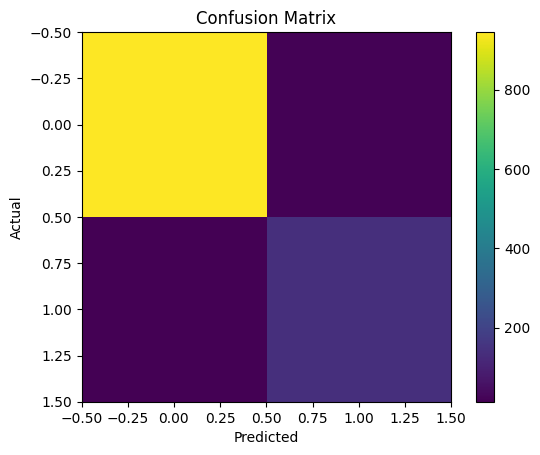

Top words influencing spam:
just
prize
reply
text
claim
stop
mobile
ur
txt
free


AttributeError: 'Series' object has no attribute 'nonzero'

In [2]:
# Harish MK
# Roll No: 24BAD031

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

df = pd.read_csv("spam.csv", encoding='latin-1')
df = df[['v1','v2']]
df.columns = ['label','message']

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['message'] = df['message'].apply(clean_text)

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['message'])

df['label'] = df['label'].map({'ham':0, 'spam':1})
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = MultinomialNB(alpha=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

mis = np.where(y_test != y_pred)
print("Misclassified messages:", len(mis[0]))

cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

feature_names = vectorizer.get_feature_names_out()
spam_probs = model.feature_log_prob_[1]
top_spam_words = np.argsort(spam_probs)[-10:]

print("Top words influencing spam:")
for i in top_spam_words:
    print(feature_names[i])

spam_words = X[y==1].sum(axis=0)
ham_words = X[y==0].sum(axis=0)

plt.bar(["Spam Words","Ham Words"],
        [spam_words.sum(), ham_words.sum()])
plt.title("Word Frequency Comparison")
plt.show()
